In [54]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn import preprocessing

from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import LeaveOneOut

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics

from scipy.stats import sem, t
from scipy import mean

#Oversampling
# from imblearn.over_sampling import RandomOverSampler
from kmeans_smote import KMeansSMOTE


### multiprocessing
from multiprocessing.pool import Pool


In [55]:
data = pd.read_csv('prepared Data.csv')
print(data.shape)
data.head()


(922, 33)


,gender,age,SBP,BMI,etiology of CKD,Hb,Alb,Cr,eGFR,CKD_stage,...,eGFR(6M),eGFR(12M),eGFR(18M),eGFR(24M),eGFR(30M),eGFR(36M),eGFR(last visit),average_obs,obsevasion_ duration,fclass
0,2,74,120.0,23.137669,2,12.0,4.0,1.20,89.981926,3,...,26.454698,24.331582,24.682189,21.614854,20.420524,20.420524,18.495328,25.275139,37,0
1,1,57,139.0,28.515625,2,15.9,4.8,0.84,88.330020,2,...,78.287758,71.343858,72.845992,71.908942,71.562914,67.225032,67.225032,72.392152,37,0
2,1,32,154.0,24.582701,4,14.4,4.4,0.87,86.973875,2,...,75.027238,69.595257,68.856399,72.901926,69.749275,69.171408,69.171408,72.694258,36,0
3,1,60,144.0,30.737407,2,14.4,4.7,2.22,86.874201,4,...,26.885061,24.917353,28.581660,29.237135,25.556002,25.183703,25.183703,26.485251,35,0
4,1,49,135.0,23.758726,2,17.0,4.1,1.39,86.782629,3,...,46.978867,45.829455,41.488436,41.801561,38.106104,38.106104,38.106104,43.081581,30,0


In [56]:
col = data.columns

In [57]:
count = Counter(data['fclass'])
count


Counter({0: 611, 1: 170, 5: 51, 2: 42, 6: 48})

# Feature Selection

In [121]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
importances = dict()
for col in data.iloc[:,:-1].columns:
    importances[col] = 0

for i in range(50):
    model = ExtraTreesClassifier()
    model.fit(data.iloc[:,:-1],data['fclass'])
    matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
    # print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=data.iloc[:,:-1].columns)
    for col in data.iloc[:,:-1].columns:
        importances[col] += dict(feat_importances)[col]
#     feat_importances.nlargest(5).plot(kind='barh')
#     plt.show()
    
newpd = pd.DataFrame()
for col in data.iloc[:,:-1].columns:
    newpd[col] = list([importances[col]])
newpd.to_csv('feature_importamce.csv', index=False)

,gender,age,SBP,BMI,etiology of CKD,Hb,Alb,Cr,eGFR,CKD_stage,...,eGFR(0M),eGFR(6M),eGFR(12M),eGFR(18M),eGFR(24M),eGFR(30M),eGFR(36M),eGFR(last visit),average_obs,obsevasion_ duration
0,0.141026,0.274589,0.226723,0.214286,0.236418,0.252488,0.34037,0.289644,0.213048,0.240891,...,0.317065,0.364381,0.445874,0.506843,0.620132,0.643818,0.733924,0.746836,0.461023,0.401767


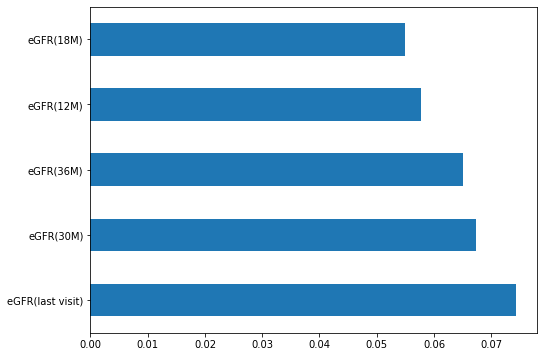

In [86]:
model = ExtraTreesClassifier()
model.fit(data.iloc[:,:-1],data['fclass'])
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.iloc[:,:-1].columns)

feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [100]:
importances['age'] += dict(feat_importances)['age']
importances['age']

0.4695713812580669

In [119]:
importances[col]

0.40211984306286014

# Tuning

In [17]:
CL = SVC(kernel='poly',gamma='scale',class_weight='balanced', C=8.0)
model = CL.fit(data.values[:,:-1], data.values[:,-1])
# model.predict(data.values[100:120,:-1])
predict = model.predict(data.values[100:120,:-1])

cnf_matrix = metrics.confusion_matrix(data.values[100:120,-1], predict)
# print(method)
print(cnf_matrix)

[[3 0 1 9]
 [0 2 0 1]
 [0 0 0 0]
 [0 0 1 3]]


In [18]:
from sklearn.model_selection import GridSearchCV 
  
# # defining parameter range for SVM
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['poly','rbf','sigmoid']}  
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# grid.fit(data.values[:,:-1], data.values[:,-1]) 

# Oversampling

In [19]:
# X, y = data.values[:int(800),:-1], data.values[:int(800),-1]
# [print('Class {} has {} instances'.format(label, count))
#  for label, count in zip(*np.unique(y, return_counts=True))]

# kmeans_smote = KMeansSMOTE(
#     kmeans_args={
#         'n_clusters': 63
#     },
#     smote_args={
#         'k_neighbors': 10
#     }
# )
# X_resampled, y_resampled = kmeans_smote.fit_sample(X, y)

# [print('Class {} has {} instances after oversampling'.format(label, count))
#  for label, count in zip(*np.unique(y_resampled, return_counts=True))]
# print(Counter(y_resampled))

In [20]:
# define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')

## Below code works for binary classification 
# oversample = RandomOverSampler(sampling_strategy=0.5)

In [21]:

# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')

# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(data.values[:,:-1], data.values[:,-1])

# Max = dict(Counter(y_over))[0.0]
# flag = True
# while flag:
#     X_over, y_over = oversample.fit_resample(X_over, y_over)
#     for x in list(dict(Counter(y_over)).values()):
#         if x == Max:
#             flag = False
#         else:
#             flag = True
#             break
        
# # summarize class distribution
# print(Counter(y_over))

In [22]:
# adict = dict()
# adict.update(zip(d.columns,col[:-1]))
# adict

In [23]:
# d = pd.DataFrame(X_over)
# adict = dict()
# adict.update(zip(d.columns,col[:-1]))
# d.rename(columns = adict, inplace =True)
# d['fclass'] = y_over
# d.head()

In [24]:
# count = Counter(data['fclass'])
# count

In [35]:
# data = d.copy()

In [48]:
cat0 = shuffle(data[data['fclass']==0])
cat1 = shuffle(data[data['fclass']==1])
cat2 = shuffle(data[data['fclass']==2])
cat5 = shuffle(data[data['fclass']==5])
cat6 = shuffle(data[data['fclass']==6])


In [49]:

lenCat0 = len(cat0.iloc[:,0])
lenCat1 = len(cat1.iloc[:,0])
lenCat2 = len(cat2.iloc[:,0])
lenCat5 = len(cat5.iloc[:,0])
lenCat6 = len(cat6.iloc[:,0])


In [50]:
methodList = []
accRes = []
accConf = []
nFold = 10
# sensitivityList = []
# specificityList = []

In [51]:
basicMethods = ['Gradient Boosting','Support Vector Machine', 'Logistic Regression', 'K Neighbors Classifier',\
                'Random Forest', 'Gaussian Naive Bayes', 'Linear Discriminant Analysis', 'Decision Tree']

methods = ['soft_VotingClassifier','hard_VotingClassifier', 'Gradient Boosting','Support Vector Machine',\
           'Logistic Regression', 'K Neighbors Classifier', 'Random Forest', 'Gaussian Naive Bayes',\
          'Linear Discriminant Analysis', 'Decision Tree']
# methods = ['hard_VotingClassifier']

In [52]:
## 10 fold-CV

def classifiers(method):
    if method == 'Logistic Regression':
        CL = LogisticRegression()
        
    if method == 'K Neighbors Classifier':
        CL = KNeighborsClassifier(n_neighbors=10)
    if method == 'Random Forest':
        CL = RandomForestClassifier(max_depth=35)
    if method == 'Gaussian Naive Bayes':
        CL = GaussianNB()
    if method == 'Linear Discriminant Analysis':
        CL = LinearDiscriminantAnalysis()
    if method == 'Decision Tree':
        CL = DecisionTreeClassifier()
    if method == 'Support Vector Machine':
        CL = SVC(C=0.1, gamma=0.0001, kernel='poly',probability=True)
#         class_weight='balanced', C=1.0
    if method == 'Gradient Boosting':
        CL = GradientBoostingClassifier()
    if method == 'soft_VotingClassifier':
        cl1 = LogisticRegression()
        cl2 = KNeighborsClassifier(n_neighbors=10)
        cl3 = RandomForestClassifier(max_depth=35)
        cl4 = GaussianNB()
        cl5 = LinearDiscriminantAnalysis()
        cl6 = DecisionTreeClassifier()
        cl7 = SVC(C=0.1, gamma=0.0001, kernel='poly',probability=True)
        cl8 = GradientBoostingClassifier()
        estimator = [(basicMethods[0],cl1), (basicMethods[1],cl2), (basicMethods[2],cl3),\
                     (basicMethods[3],cl4), (basicMethods[4],cl5), (basicMethods[5],cl6),\
                     (basicMethods[6],cl7), (basicMethods[7],cl8)]
        CL = VotingClassifier(estimators=estimator, voting='soft', weights=[6, 10, 5, 5, 10, 5, 6, 8])
        
    if method == 'hard_VotingClassifier':
        cl1 = LogisticRegression()
        cl2 = KNeighborsClassifier(n_neighbors=10)
        cl3 = RandomForestClassifier(max_depth=35)
        cl4 = GaussianNB()
        cl5 = LinearDiscriminantAnalysis()
        cl6 = DecisionTreeClassifier()
        cl7 = SVC(C=0.1, gamma=0.0001, kernel='poly',probability=True)
        cl8 = GradientBoostingClassifier()
        estimator = [(basicMethods[0],cl1), (basicMethods[1],cl2), (basicMethods[2],cl3),\
                     (basicMethods[3],cl4), (basicMethods[4],cl5), (basicMethods[5],cl6),\
                     (basicMethods[6],cl7), (basicMethods[7],cl8)]
        CL = VotingClassifier(estimators=estimator, voting='hard')
    if method == 'stacking classifir':
        estimator = [(basicMethods[0],cl1), (basicMethods[1],cl2), (basicMethods[2],cl3),\
             (basicMethods[3],cl4), (basicMethods[4],cl5), (basicMethods[5],cl6),\
             (basicMethods[6],cl7), (basicMethods[7],cl8)]
        stacking = StackingClassifier(estimators=estimator)
#     print(type(CL))
    accList = []
    for j in range(nFold):

        i = j*.1
        k = (j+1)*.1
        #train
        X_train = cat0.iloc[int(k * lenCat0):,:-1].append(\
                  cat1.iloc[int(k * lenCat1):,:-1].append(\
                  cat2.iloc[int(k * lenCat2):,:-1].append(\
                  cat5.iloc[int(k * lenCat5):,:-1].append(\
                  cat6.iloc[int(k * lenCat6):,:-1].append(\
                  cat0.iloc[:int(i * lenCat0),:-1].append(\
                  cat1.iloc[:int(i * lenCat1),:-1].append(\
                  cat2.iloc[:int(i * lenCat2),:-1].append(\
                  cat5.iloc[:int(i * lenCat5),:-1].append(\
                  cat6.iloc[:int(i * lenCat6),:-1]                                       
                                                         )))))))))

        y_train = cat0.iloc[int(k * lenCat0):,-1].append(\
                  cat1.iloc[int(k * lenCat1):,-1].append(\
                  cat2.iloc[int(k * lenCat2):,-1].append(\
                  cat5.iloc[int(k * lenCat5):,-1].append(\
                  cat6.iloc[int(k * lenCat6):,-1].append(\
                  cat0.iloc[:int(i * lenCat0),-1].append(\
                  cat1.iloc[:int(i * lenCat1),-1].append(\
                  cat2.iloc[:int(i * lenCat2),-1].append(\
                  cat5.iloc[:int(i * lenCat5),-1].append(\
                  cat6.iloc[:int(i * lenCat6),-1]                                         
                                                        )))))))))
#         print(X_train.shape, y_train.shape)


        #preprocessing
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_transformed = scaler.transform(X_train)
        X_test_transformed = scaler.transform(X_test)    

        # fit and apply the Oversampling:
        #### Repeatitive oversampling
#         X_over, y_over = oversample.fit_resample(X_train, y_train)

#         Max = dict(Counter(y_over))[0.0]
#         flag = True
#         while flag:
#             X_over, y_over = oversample.fit_resample(X_over, y_over)
#             for x in list(dict(Counter(y_over)).values()):
#                 if x == Max:
#                     flag = False
#                 else:
#                     flag = True
#                     break
#         X_train, y_train = X_over.copy(), y_over.copy()
        # summarize class distribution
#         print(Counter(y_train))

#         print(X_train.shape, y_train.shape)
    

        # fit and apply the Oversampling:
        #### K-means oversampling
#         [print('Class {} has {} instances'.format(label, count))
#          for label, count in zip(*np.unique(y, return_counts=True))]

        kmeans_smote = KMeansSMOTE(
            kmeans_args={
                'n_clusters': 63
            },
            smote_args={
                'k_neighbors': 10
            }
        )
        X_train, y_train = kmeans_smote.fit_sample(X_train, y_train)

#         [print('Class {} has {} instances after oversampling'.format(label, count))
#          for label, count in zip(*np.unique(y_resampled, return_counts=True))]
        # summarize class distribution
#         print(Counter(y_train))

        #test
        X_test = cat0.iloc[int(i * lenCat0):int(k * lenCat0),:-1].append(\
                 cat1.iloc[int(i * lenCat1):int(k * lenCat1),:-1].append(\
                 cat2.iloc[int(i * lenCat2):int(k * lenCat2),:-1].append(\
                 cat5.iloc[int(i * lenCat5):int(k * lenCat5),:-1].append(\
                 cat6.iloc[int(i * lenCat6):int(k * lenCat6),:-1]))))

        y_test = cat0.iloc[int(i * lenCat0):int(k * lenCat0),-1].append(\
                 cat1.iloc[int(i * lenCat1):int(k * lenCat1),-1].append(\
                 cat2.iloc[int(i * lenCat2):int(k * lenCat2),-1].append(\
                 cat5.iloc[int(i * lenCat5):int(k * lenCat5),-1].append(\
                 cat6.iloc[int(i * lenCat6):int(k * lenCat6),-1]))))
#         print(X_test.shape, y_test.shape)

        
        model = CL.fit(X_train, np.array(list(y_train)))
        
        predict = np.array(model.predict(X_test))
        
        cnf_matrix = metrics.confusion_matrix(y_test, predict)
#         print(method)
#         print(cnf_matrix)
#         #matplotlib inline
#         class_names=[0,1] # name  of classes
#         fig, ax = plt.subplots()
#         tick_marks = np.arange(len(class_names))
#         plt.xticks(tick_marks, class_names)
#         plt.yticks(tick_marks, class_names)

#         # create heatmap
#         sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#         ax.xaxis.set_label_position("top")
#         plt.tight_layout()
#         plt.title(method+ ' fold of '+str(j), y=1.1)

#         plt.ylabel('Actual label')
#         plt.xlabel('Predicted label')

#         plt.show()


        acc = metrics.accuracy_score(y_test.values, predict)
        accList.append(acc)


    methodList.append(method)
    confidence = 0.95

    naccList = len(accList)
    maccList = np.mean(accList)
    std_erraccList = sem(accList)
    haccList = std_erraccList * t.ppf((1 + confidence) / 2, naccList - 1)




#     print("Accuracy:         "+ str(round(maccList,2)) + '  -+' + str(round(haccList,4)))
    accRes.append(round(maccList,2))
    accConf.append(round(haccList,4))
    return (method, round(maccList,2), round(haccList,4))


In [ ]:
if __name__ == "__main__":
    p = Pool(processes=7)
    result1 = p.map(classifiers, methods)
    p.close()
    p.join()

In [45]:
result = pd.DataFrame(result1)
result.columns = ['Method','Accuracy','ACC CI']

In [46]:
result

,Method,Accuracy,ACC CI
0,soft_VotingClassifier,0.58,0.0513
1,hard_VotingClassifier,0.61,0.0389
2,Gradient Boosting,0.72,0.0361
3,Support Vector Machine,0.31,0.0346
4,Logistic Regression,0.32,0.0349
5,K Neighbors Classifier,0.42,0.0257
6,Random Forest,0.76,0.0387
7,Gaussian Naive Bayes,0.41,0.0234
8,Linear Discriminant Analysis,0.47,0.0428
9,Decision Tree,0.64,0.0238


In [47]:
# # result = []
# result = pd.DataFrame(result1)
# result['Method'],result['Accuracy'],result['ACC CI'] = methodList,accRes,accConf
result.to_excel('kidney_Classification_Result_preprocess before oversampling.xlsx',index=False)
result

,Method,Accuracy,ACC CI
0,soft_VotingClassifier,0.58,0.0513
1,hard_VotingClassifier,0.61,0.0389
2,Gradient Boosting,0.72,0.0361
3,Support Vector Machine,0.31,0.0346
4,Logistic Regression,0.32,0.0349
5,K Neighbors Classifier,0.42,0.0257
6,Random Forest,0.76,0.0387
7,Gaussian Naive Bayes,0.41,0.0234
8,Linear Discriminant Analysis,0.47,0.0428
9,Decision Tree,0.64,0.0238
